In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.

first_row = session.query(Measurement).first()
first_row.__dict__

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

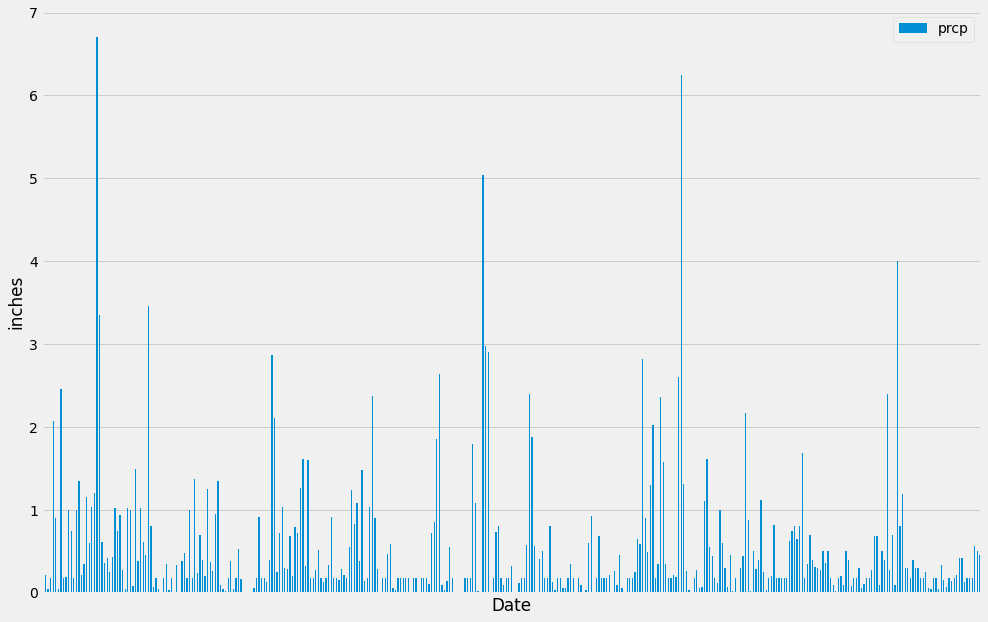

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date.desc()).all()
query

# Save the query results as a Pandas DataFrame and set the index to the date column

df_prcp = pd.DataFrame(query).set_index('date')

df = df_prcp.fillna(df_prcp['prcp'].mean())
df.rename(columns={'prcp':'Precipitation'})
df1 = df.groupby('date').max()
df1
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

plt.style.use('fivethirtyeight')
n = 2016-8-23
df1.plot.bar(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('inches')
plt.xticks([])
plt.savefig("Images/precipitation.png")
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,prcp
count,365.000000
mean,0.548739
std,0.812525
min,0.000000
25%,0.176462
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset

second_row = session.query(Measurement).first()
second_row.__dict__

# session.query(Measurement.station).count()

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x182a8953128>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

records = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

for record in records:
    print(record)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
st1 = 'USC00519281'
l_tob = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == st1).all()
avg_tob = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == st1).all()
h_tob = session.query(func.max_(Measurement.tobs)).\
    filter(Measurement.station == st1).all()

s_name = session.query(Station.name).\
    filter(Station.station == st1).all()

print(f'The station {s_name} with ID {st1} has shown as lowest temperature {l_tob}°, its average temperature is of {avg_tob}° and the highest temperature it has ever had is of {h_tob}° FH degrees. ')

The station [('WAIHEE 837.5, HI US',)] with ID USC00519281 has shown as lowest temperature [(54.0,)]°, its average temperature is of [(71.66378066378067,)]° and the highest temperature it has ever had is of [(85.0,)]° FH degrees. 


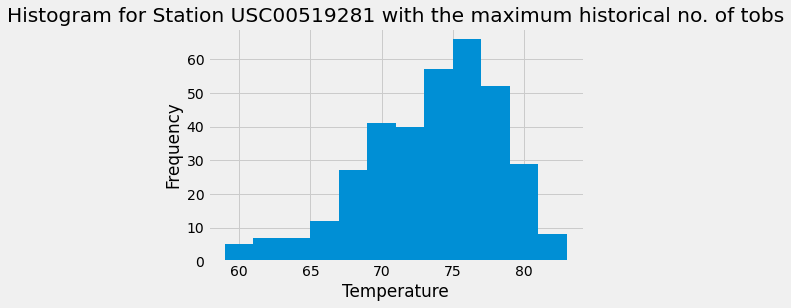

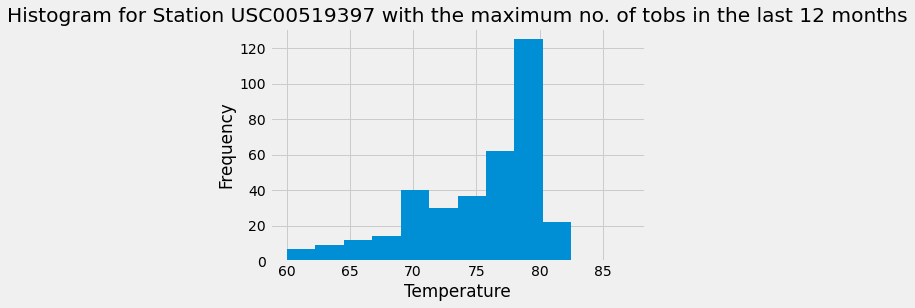

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

records_1 = session.query(Measurement.station, func.count(Measurement.station)).\
    filter(Measurement.date > query_date).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

# for record in records_1:
#     print(record)

st2 = 'USC00519397'

y_tobs = session.query(Measurement.tobs).\
            filter(Measurement.station == st1).filter(Measurement.date > query_date).all()
df_y_tobs = pd.DataFrame(y_tobs)

x = np.array(df_y_tobs)
plt.hist(x, bins=12)
plt.title('Histogram for Station USC00519281 with the maximum historical no. of tobs')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.savefig("Images/Station_Histogram1.png")
plt.show()

y_tobs1 = session.query(Measurement.tobs).\
            filter(Measurement.station == st2).filter(Measurement.date > query_date).all()
df_y_tobs1 = pd.DataFrame(y_tobs1)

x = np.array(df_y_tobs1)
plt.hist(x, bins=12)
plt.title('Histogram for Station USC00519397 with the maximum no. of tobs in the last 12 months')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.savefig("Images/Station-Histogram.png")
plt.show()
# import plotly.express as px

# fig = px.histogram(y_tobs_r, x='Temperature', nbins=20)
# fig.show()

# Close session

In [22]:
# Close Session
session.close()